In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
# Required Basic Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# commented for some other preparations

# # To plot pretty figures
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "classification"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

## Import the Data: MNIST
**MNIST**: A set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau.

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [12]:
X.index

RangeIndex(start=0, stop=70000, step=1)

In [9]:
X.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

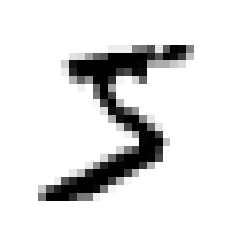

In [20]:
some_digit = X.loc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [21]:
y.loc[0]

'5'

In [24]:
y = y.astype(np.uint8)

In [28]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

## Split Train_Test Set

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classifier
### 5-detector
Only detect if the number is 5 or not.

In [31]:
y_train_5 = (y_train == 5)
t_test_5 = (y_test == 5)

#### Stochastic Gradient Descent (SGD)

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42, n_jobs = -1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(n_jobs=-1, random_state=42)

### Performance Measures

#### Accuracy

In [35]:
# Use sklearn cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [38]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [39]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

#### Confusion Matrix

In [42]:
# Use sklearn cross validation
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # this returns a clean predictions
# clean predictions means that the prediction is made by a model that never saw the data during training

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### Precision and Recall

In [47]:
from sklearn.metrics import precision_score, recall_score

In [48]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [49]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [50]:
# f1 score: check precision and recall at once
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

#### Precision and Recall Trade-Off

In [51]:
# use cross-validation to get clean decision function scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [59]:
# compute all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

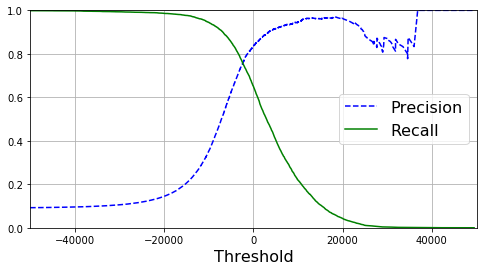

In [64]:
# use Matplotlib to plot the precision and recall curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

# recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
    
plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
# plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
# plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
# plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
# plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

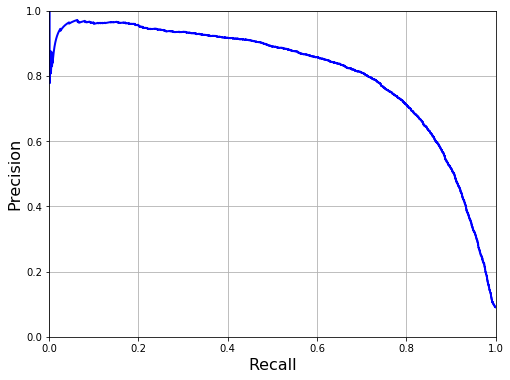

In [65]:
# direct precision vs recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
# plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
# plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
# plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [66]:
# those two lines give you the idea on how to get a threshold with target precision
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [67]:
# make a prediction!
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [68]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [69]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

#### ROC Curve

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

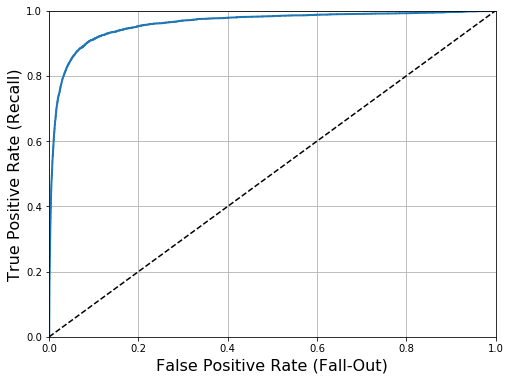

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
# fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
# plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
# save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [72]:
# get the ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008617

## More Models!

In [82]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [75]:
y_probas_forest

array([[0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [0.03, 0.97],
       [0.94, 0.06],
       [0.89, 0.11]])

In [76]:
# use probabilities for ROC CURVE
y_scores_forest = y_probas_forest[:, 1] # this gives the probability for positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

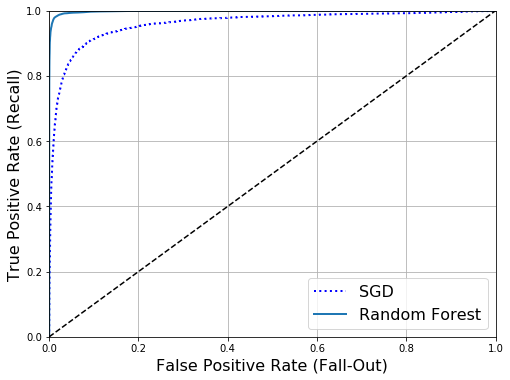

In [78]:
# recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
# plt.plot([fpr_90], [recall_90_precision], "ro")
# plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
# plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
# save_fig("roc_curve_comparison_plot")
plt.show()

In [79]:
# check the roc auc score of the RandomForest
roc_auc_score(y_train_5, y_scores_forest)

0.9982664676473307

In [83]:
# check f1 score
f1_score(y_train_5, y_forest)

0.9282849036297818

## Multiclass Classfication

In [84]:
# Support Vector Machine
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [85]:
# check the scores: OvO strategy
some_digit_scores = svm_clf.decision_function([some_digit])

In [86]:
some_digit_scores

array([[ 1.72502321,  2.72810019,  7.25098853,  8.30763599, -0.31087272,
         9.31324831,  1.70975311,  2.76765488,  6.2304951 ,  4.8477127 ]])

In [87]:
# There is a possibility to decide between OvO and OvR by yourself

# for example, when you want to force OvR on the SVC model
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [90]:
# due to computational power limit, we will run the cross-validation problem later